<a href="https://colab.research.google.com/github/YShukla2024/DataAnalysis_Task/blob/main/Confnyz_intern/Data_Analysis_Internship_tasks_at_Cognifyz_Technologies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Data Analysis on restaurant_data

Prerequisite for data analysis

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Data Load

In [ ]:
df = pd.read_csv("restaurant_data.csv")
df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270


In [ ]:
df.shape

(9551, 21)

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


## Level 1

**Level 1 (Task  1): Top Cuisines**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
top_cuisines = df['Cuisines'].value_counts().head(3)
print(top_cuisines)

Cuisines
North Indian             936
North Indian, Chinese    511
Chinese                  354
Name: count, dtype: int64


**The top 3 cuisines with value count**

1.North Indian ->936

2.North Indian, Chinese ->511

3.Chinese ->354

In [ ]:
percentage = (top_cuisines / len(df)) * 100
print(percentage)

Cuisines
North Indian             9.800021
North Indian, Chinese    5.350225
Chinese                  3.706418
Name: count, dtype: float64


**the percentage of
restaurants that serve each of the top
cuisines**

North Indian  -> 9.800021

North Indian, Chinese  -> 5.350225

Chinese  ->3.706418

Level 1 (Task  2): **City Analysis**

In [ ]:
city_counts = df['City'].value_counts()

# Get the city with highest count

top_city = city_counts.idxmax()
print('top_city ->',top_city)

print()

top_count = city_counts.max()
print('top_count ->',top_count)

top_city -> New Delhi

top_count -> 5473


The city with the highest number of restaurants is 'New Delhi' with 5473 restaurants.

**Calculate the average rating for
restaurants in each city.**

In [ ]:
city_stats = df.groupby('City').agg({
    'Restaurant ID': 'count',
    'Aggregate rating': 'mean'
}).reset_index()

city_stats.columns = ['City', 'Restaurant Count', 'Average Rating']

city_stats_sorted = city_stats.sort_values(by='Average Rating', ascending=False)

# Display result
print(city_stats_sorted)

                 City  Restaurant Count  Average Rating
56         Inner City                 2        4.900000
107       Quezon City                 1        4.800000
73        Makati City                 2        4.650000
95         Pasig City                 3        4.633333
75   Mandaluyong City                 4        4.625000
..                ...               ...             ...
88          New Delhi              5473        2.438845
83          Montville                 1        2.400000
78          Mc Millan                 1        2.400000
89              Noida              1080        2.036204
43          Faridabad               251        1.866932

[141 rows x 3 columns]


**Calculate the average rating for
restaurants in each city.**

In [ ]:
city_stats_sorted.head(3)

,City,Restaurant Count,Average Rating
56,Inner City,2,4.90
107,Quezon City,1,4.80
73,Makati City,2,4.65


**Determine the city with the highest
average rating of top 3 city .**

In [ ]:
city_stats_sorted['Average Rating'].head(3)

,Average Rating
56,4.90
107,4.80
73,4.65


**conclusion:**

City with the highest average rating is **'Inner City**' with a rating of **4.90**

**Level 1 (Task 3)**:Price Range Distribution

Create a **histogram** or **bar chart** to
visualize the distribution of price ranges
among the restaurants.

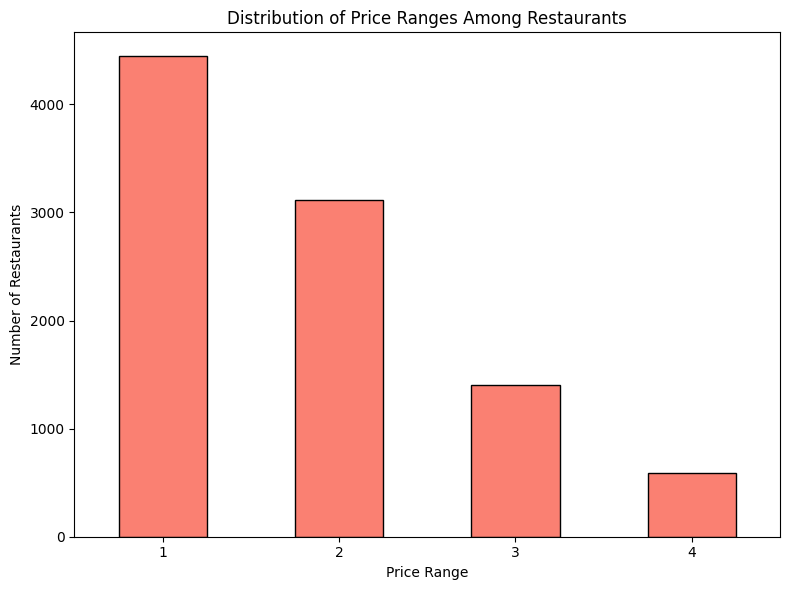

In [ ]:
import matplotlib.pyplot as plt

price_range_counts = df['Price range'].value_counts().sort_index()

# Plot as a bar chart
plt.figure(figsize=(8, 6))
price_range_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

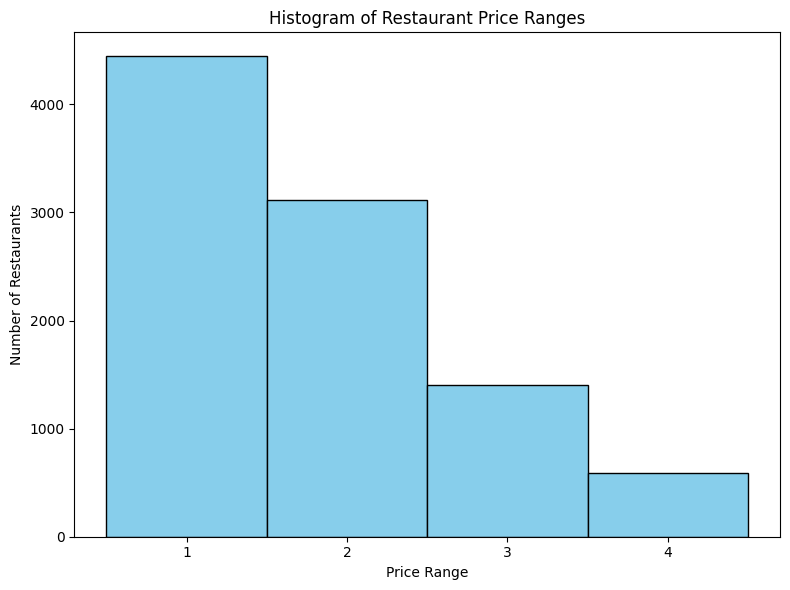

In [ ]:
# Plot as a histograms chart

plt.figure(figsize=(8, 6))
plt.hist(df['Price range'], bins=range(1, df['Price range'].max() + 2), color='skyblue', edgecolor='black', align='left')
plt.title('Histogram of Restaurant Price Ranges')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(range(1, df['Price range'].max() + 1))
plt.tight_layout()
plt.show()

Calculate the percentage of restaurants
in each price range category.

In [ ]:
price_range_percent = (price_range_counts / len(df)) * 100

price_range_summary = pd.DataFrame({
    'Price Range': price_range_counts.index,
    'Restaurant Count': price_range_counts.values,
    'Percentage': price_range_percent.values.round(2)
})

print(price_range_summary)

   Price Range  Restaurant Count  Percentage
0            1              4444       46.53
1            2              3113       32.59
2            3              1408       14.74
3            4               586        6.14


Conclusion:

There are **four type** of prince ranges in restaurants with the **highest** **restaurent count 4444** with percentage of **46.53%**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


**Level 1 (Task 4)**:Online Delivery

1.Determine the percentage of restaurants
that offer online delivery.

In [ ]:
pcounts = df['Has Online delivery'].value_counts()

In [ ]:
percentage_of_restaurants_that_offer_online_delivery = (pcounts / len(df)) * 100
percentage_of_restaurants_that_offer_online_delivery

,count
Has Online delivery,
No,74.337766
Yes,25.662234


**Conclusion:**

**25.662234%** of restaurants offer online delevery

2.Compare the average ratings of restaurants
with and without online delivery.

In [ ]:
Avg_rating_with_online_deliverry = df[df['Has Online delivery']=='Yes']['Aggregate rating'].mean()
Avg_rating_without_online_deliverry = df[df['Has Online delivery']=='No']['Aggregate rating'].mean()

Avg_rating_with_online_deliverry

In [ ]:
print(Avg_rating_with_online_deliverry)

3.2488372093023257


Avg_rating_without_online_deliverry

In [ ]:
print(Avg_rating_without_online_deliverry)

2.465295774647887


**Conclusion**:

1.Avg_rating_with_online_deliverry :3.2488372093023257

---
2.Avg_rating_without_online_deliverry :2.465295774647887



## Level 3

**Level 3(Task_1)**:Restaurant Reviews

1.Analyze the text reviews to identify the most
common positive and negative keywords.

In [ ]:
df['Rating text'].value_counts()

,count
Rating text,
Average,3737
Not rated,2148
Good,2100
Very Good,1079
Excellent,301
Poor,186


In [ ]:
M_C_Positive = df[df['Rating text']=='Good'].value_counts()
M_C_Positive.head(3)

,,,,,,,,,,,,,,,,,,,,,count
Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,
18466978,Gatsby Kitchen & Bar by Club BW,1,New Delhi,"N-4, N Block Market, Greater Kailash (GK) 1, New Delhi",Greater Kailash (GK) 1,"Greater Kailash (GK) 1, New Delhi",0.0,0.0,"Continental, North Indian",2100,Indian Rupees(Rs.),Yes,No,No,No,4,3.5,Yellow,Good,22,1
18466951,Jungle Jamboree,1,Noida,"Logix City Centre, FD-03, 2nd Floor, Sector 32 Near, Sector 34, Noida","Logix City Centre, Sector 32, Noida","Logix City Centre, Sector 32, Noida, Noida",0.0,0.0,"North Indian, Continental, Chinese, Italian, Thai, Mughlai",1200,Indian Rupees(Rs.),No,No,No,No,3,3.8,Yellow,Good,46,1
18464054,Republic Of Food Lovers,1,New Delhi,"Shop 20, Sainik Vihar Market, Pitampura, New Delhi",Pitampura,"Pitampura, New Delhi",0.0,0.0,Fast Food,400,Indian Rupees(Rs.),No,No,No,No,1,3.6,Yellow,Good,27,1


In [ ]:
M_C_Negative = df[df['Rating text']=='Average'].value_counts()
M_C_Negative.head(3)

,,,,,,,,,,,,,,,,,,,,,count
Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,
18493989,Makansutra Gluttons Bay,184,Singapore,"803 Raffles Avenue, #01-15 Esplanade Mall 039802","Marina Centre, Downtown Core","Marina Centre, Downtown Core, Singapore",103.855867,1.289762,"Singaporean, Chinese, Seafood, Malay, Indian",30,Dollar($),No,No,No,No,3,3.0,Orange,Average,25,1
53,Amber,1,New Delhi,"N-19, Connaught Place, New Delhi",Connaught Place,"Connaught Place, New Delhi",77.220891,28.630197,"North Indian, Chinese, Mughlai",1800,Indian Rupees(Rs.),Yes,Yes,No,No,3,2.6,Orange,Average,152,1
60,Colonel's Kababz,1,New Delhi,"29, Defence Colony Market, Defence Colony, New Delhi",Defence Colony,"Defence Colony, New Delhi",77.230591,28.574036,"North Indian, Mughlai",900,Indian Rupees(Rs.),Yes,No,No,No,2,3.2,Orange,Average,600,1


**Conclusion**:

 1.Most common positive in the text rating is **Good** those value count is **2100**

---
2.Most common Negative in the Text Rating is **Average** those value count is **3737**


2.Calculate the average length of reviews and
explore if there is a relationship between
review length and rating.

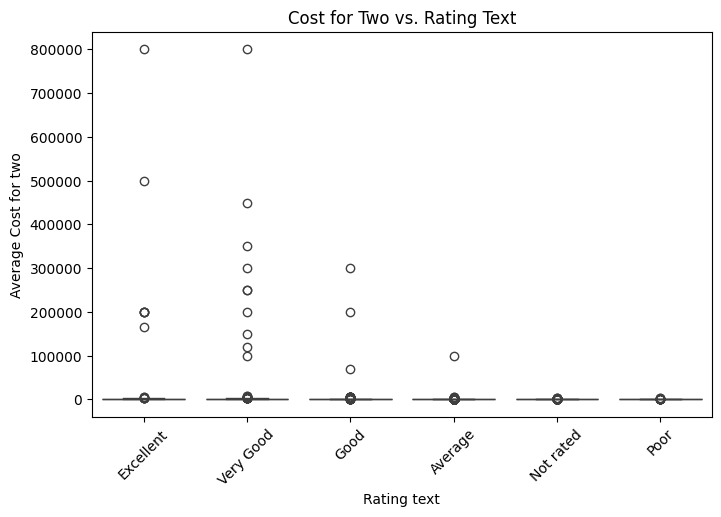

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Rating text', y='Average Cost for two', data=df)
plt.title('Cost for Two vs. Rating Text')
plt.xticks(rotation=45)
plt.show()

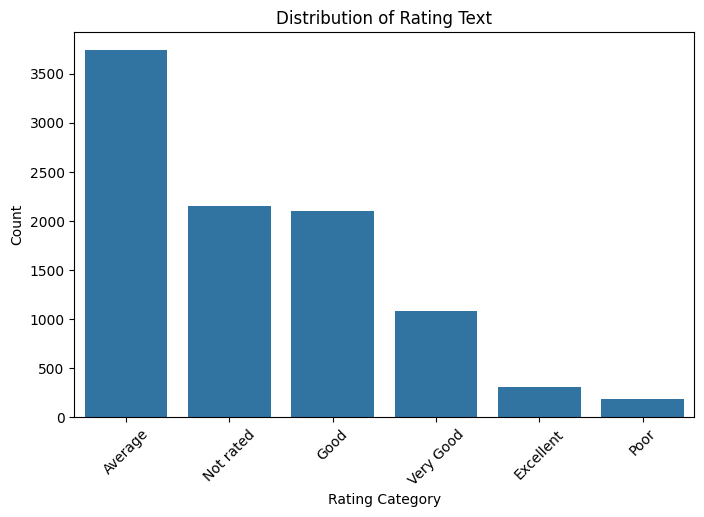

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Rating text', data=df, order=df['Rating text'].value_counts().index)
plt.title('Distribution of Rating Text')
plt.xlabel('Rating Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Level 3(Task2)**:Votes Analysis

1.Identify the restaurants with the highest and
lowest number of votes.

In [ ]:
Highest_vote = df.loc[df['Votes'].idxmax()]
Highest_vote[['Restaurant Name','Votes','Aggregate rating','City']]

,728
Restaurant Name,Toit
Votes,10934
Aggregate rating,4.8
City,Bangalore


In [ ]:
Lowest_votes = df[df['Votes']>0].loc[df[df['Votes']>0]['Votes'].idxmin()]

Lowest_votes[['Restaurant Name', 'Votes', 'Aggregate rating', 'City']]

,58
Restaurant Name,Quiosque Chopp Brahma
Votes,1
Aggregate rating,0.0
City,Rio de Janeiro


1.**Highest Restaurant Name** -> Toit,
**Votes	->10934**

2.**Lowest Restaurant Name** -> Quiosque Chopp Brahma,
**Votes	->1**

2.Analyze if there is a correlation between the
number of votes and the rating of a
restaurant.

In [ ]:
correlation = df['Votes'].corr(df['Aggregate rating'])
print(f"\nCorrelation between Votes and Rating: {correlation:.2f}")


Correlation between Votes and Rating: 0.31


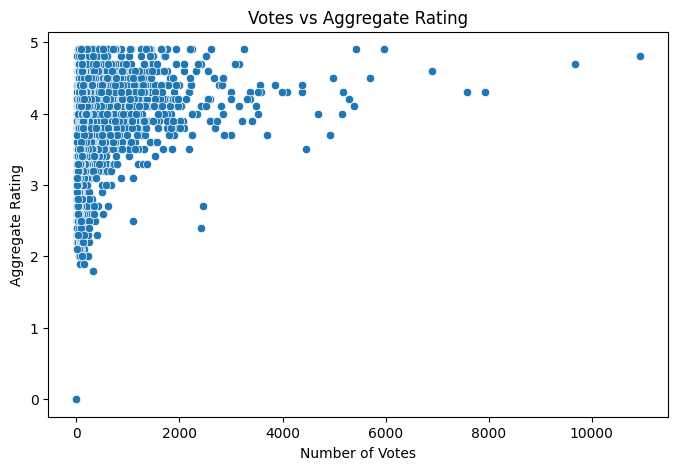

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='Votes', y='Aggregate rating', data=df)
plt.title('Votes vs Aggregate Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Aggregate Rating')
plt.show()

**Level 3(Task3)**:Price Range vs. Online Delivery and
Table Booking

1.Analyze if there is a relationship between the
price range and the availability of online
delivery and table booking.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [ ]:
df['Has Online delivery'] = df['Has Online delivery'].replace({'Yes':1,'No':0})
df['Has Table booking'] = df['Has Table booking'].replace({'Yes':1,'No':0})

<ipython-input-53-5f66a9d92127>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Has Online delivery'] = df['Has Online delivery'].replace({'Yes':1,'No':0})


In [ ]:
corr = df[['Has Online delivery','Has Table booking','Price range']].corr()

In [ ]:
corr.T

,Has Online delivery,Has Table booking,Price range
Has Online delivery,1.000000,1.000000,0.077918
Has Table booking,1.000000,1.000000,0.077918
Price range,0.077918,0.077918,1.000000


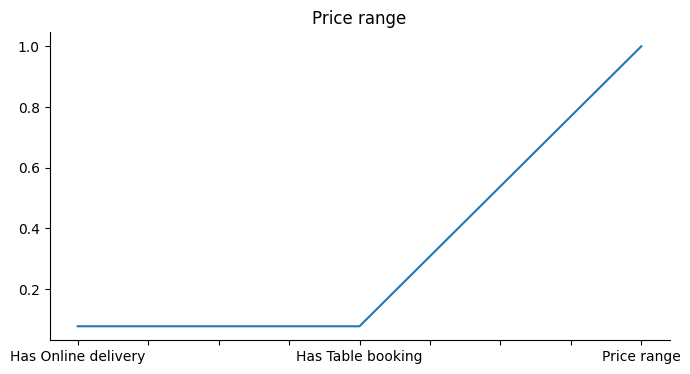

In [ ]:
from matplotlib import pyplot as plt
_df_10['Price range'].plot(kind='line', figsize=(8, 4), title='Price range')
plt.gca().spines[['top', 'right']].set_visible(False)

2.Determine if higher-priced restaurants are
more likely to offer these services.

In [ ]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [ ]:
correlations = df[['Has Table booking', 'Has Online delivery']].corrwith(df['Price range'])
print(correlations)

Has Table booking      0.077918
Has Online delivery    0.077918
dtype: float64


In [ ]:
from scipy.stats import mannwhitneyu

def test_price_difference(binary_column):
    group_yes = df[df[binary_column] == 1]['Price range']
    group_no = df[df[binary_column] == 0]['Price range']
    stat, p_value = mannwhitneyu(group_yes, group_no)
    print(f"{binary_column}: p-value = {p_value:.4f} (Significant: {p_value < 0.05})")

test_price_difference('Has Table booking')
test_price_difference('Has Online delivery')

Has Table booking: p-value = 0.0000 (Significant: True)
Has Online delivery: p-value = 0.0000 (Significant: True)


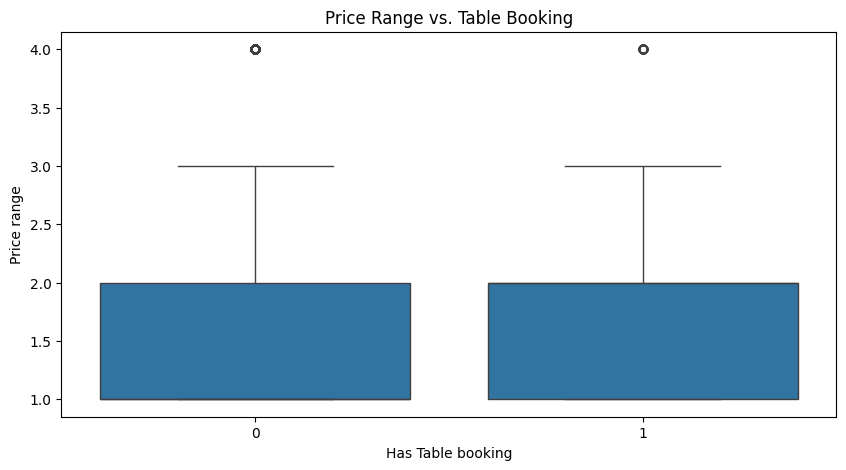

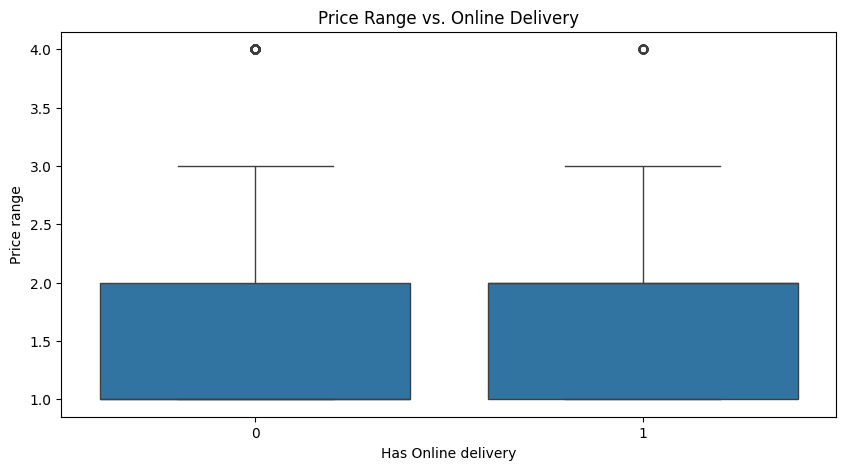

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='Has Table booking', y='Price range', data=df)
plt.title('Price Range vs. Table Booking')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Has Online delivery', y='Price range', data=df)
plt.title('Price Range vs. Online Delivery')
plt.show()